In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')

# Matplotlib settings
%matplotlib inline
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Patient ID,Age,Gender,Blood Pressure,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Symptoms,Medical History,Diagnosis,Admission Date
0,1,82,Male,127/80,56.0,33.6,100,20,Headache,Stroke,Hypertension,2023-05-06
1,2,58,Other,121/83,NaN,37.5,99,12,Fatigue,NaN,Healthy,2023-01-04
2,3,59,Other,121/85,78.0,36.5,90,15,Cough,COVID-19,Asthma,2023-10-10
3,4,21,Female,145/96,89.0,37.0,97,20,Chest Pain,Hypertension,Stroke,2023-05-17
4,5,30,Male,128/78,69.0,37.4,90,15,Chest Pain,COVID-19,Hypertension,2023-02-03


In [3]:
# Splitting Blood Pressure into two separate columns: Systolic and Diastolic
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert Systolic and Diastolic BP to numeric
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')

# Dropping the old 'Blood Pressure' column
df = df.drop('Blood Pressure', axis=1)

# Converting 'Admission Date' to datetime
df['Admission Date'] = pd.to_datetime(df['Admission Date'])

# One-Hot Encoding for 'Gender' and 'Symptoms'
df = pd.get_dummies(df, columns=['Gender', 'Symptoms' ,'Medical History' ,'Diagnosis' ], drop_first=True)

# Show the modified DataFrame
df.head()

,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,Gender_Male,...,Medical History_Diabetes,Medical History_Heart Disease,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke
0,1,82,56.0,33.6,100,20,2023-05-06,127,80,True,...,False,False,False,True,False,False,False,False,True,False
1,2,58,NaN,37.5,99,12,2023-01-04,121,83,False,...,False,False,False,False,False,False,False,True,False,False
2,3,59,78.0,36.5,90,15,2023-10-10,121,85,False,...,False,False,False,False,False,False,False,False,False,False
3,4,21,89.0,37.0,97,20,2023-05-17,145,96,False,...,False,False,True,False,False,False,False,False,False,True
4,5,30,69.0,37.4,90,15,2023-02-03,128,78,True,...,False,False,False,False,False,False,False,False,True,False


## ...............plots................

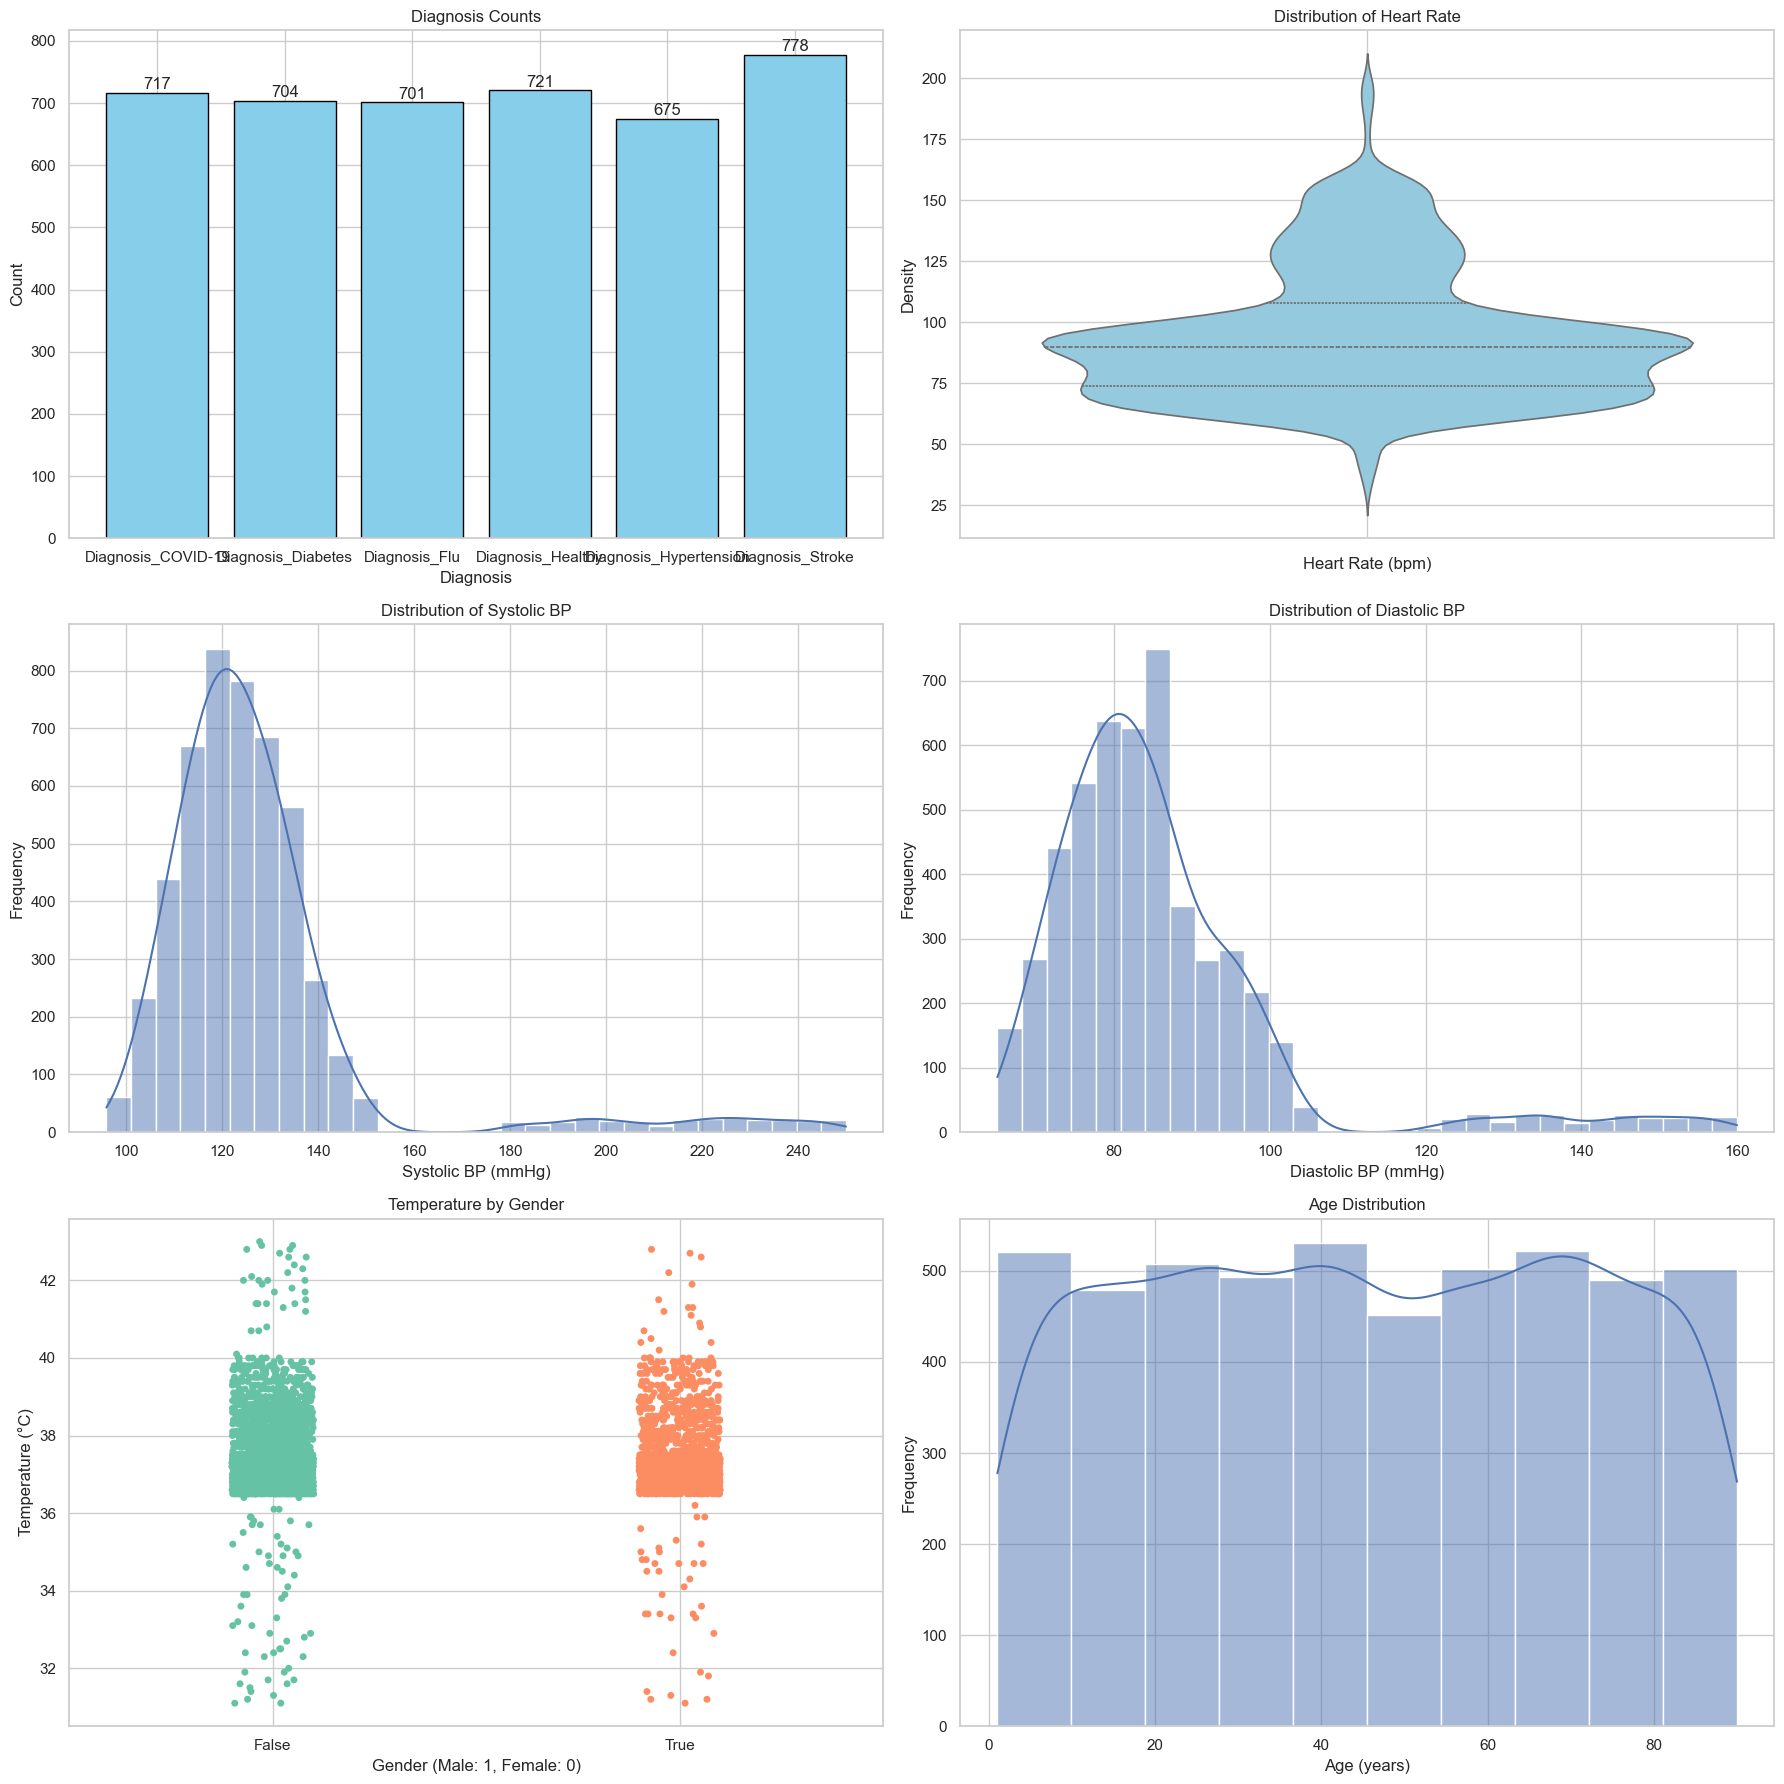

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.dates import DateFormatter

# Assuming df is your DataFrame
df['Admission Date'] = pd.to_datetime(df['Admission Date'])
df = df.sort_values('Admission Date')

fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Bar Plot for Diagnosis Counts
diagnosis_columns = ['Diagnosis_COVID-19', 'Diagnosis_Diabetes', 'Diagnosis_Flu', 'Diagnosis_Healthy', 'Diagnosis_Hypertension', 'Diagnosis_Stroke']
diagnosis_counts = df[diagnosis_columns].sum()

bars = axs[0, 0].bar(diagnosis_counts.index, diagnosis_counts.values, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Diagnosis Counts')
axs[0, 0].set_xlabel('Diagnosis')
axs[0, 0].set_ylabel('Count')
axs[0, 0].grid(True)
for bar in bars:
    yval = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Violin Plot for Heart Rate
sns.violinplot(y='Heart Rate', data=df, ax=axs[0, 1], inner='quartile', color='skyblue')
axs[0, 1].set_title('Distribution of Heart Rate')
axs[0, 1].set_xlabel('Heart Rate (bpm)')
axs[0, 1].set_ylabel('Density')
axs[0, 1].grid(True)

# Histogram for Systolic BP
sns.histplot(df['Systolic BP'].dropna(), bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Systolic BP')
axs[1, 0].set_xlabel('Systolic BP (mmHg)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Histogram for Diastolic BP
sns.histplot(df['Diastolic BP'].dropna(), bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Diastolic BP')
axs[1, 1].set_xlabel('Diastolic BP (mmHg)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

# Strip Plot for Temperature by Gender
sns.stripplot(x='Gender_Male', y='Temperature', data=df, ax=axs[2, 0], jitter=True, palette='Set2')
axs[2, 0].set_title('Temperature by Gender')
axs[2, 0].set_xlabel('Gender (Male: 1, Female: 0)')
axs[2, 0].set_ylabel('Temperature (°C)')
axs[2, 0].grid(True)

# Histogram for Age Distribution
sns.histplot(df['Age'], bins=10, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Age Distribution')
axs[2, 1].set_xlabel('Age (years)')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].grid(True)

plt.tight_layout()
plt.show()


.................plot over....................

emergency column 

In [5]:
# Function to classify emergency levels based on medical research
def classify_emergency(row):
    # Initialize emergency score
    emergency_score = 0
    
    # Blood Pressure
    if row['Systolic BP'] >= 180 or row['Diastolic BP'] >= 120:
        emergency_score += 3  # Hypertensive crisis
    elif row['Systolic BP'] >= 140 or row['Diastolic BP'] >= 90:
        emergency_score += 2  # Hypertension Stage 2
    elif row['Systolic BP'] >= 130 or row['Diastolic BP'] >= 80:
        emergency_score += 1  # Hypertension Stage 1
    
    # Heart Rate
    if row['Heart Rate'] > 100:  # Tachycardia
        emergency_score += 2
    elif row['Heart Rate'] < 60:  # Bradycardia
        emergency_score += 2
    
    # Temperature
    if row['Temperature'] > 37.5:  # Fever
        emergency_score += 1
    elif row['Temperature'] < 35.0:  # Hypothermia
        emergency_score += 3
    
    # Respiratory Rate
    if row['Respiratory Rate'] > 16:  # Respiratory distress
        emergency_score += 2
    elif row['Respiratory Rate'] < 12:
        emergency_score += 2  # Respiratory failure
    
    # Return emergency level based on score
    if emergency_score >= 6:
        return 'High'
    elif 3 <= emergency_score < 6:
        return 'Medium'
    else:
        return 'Low'

# Applying the function to classify emergency levels
df['Emergency_Level'] = df.apply(classify_emergency, axis=1)

# Convert Emergency_Level to numerical for the ML model
df['Emergency_Level'] = df['Emergency_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Display the updated DataFrame with emergency levels
df.head()


,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,Gender_Male,...,Medical History_Heart Disease,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke,Emergency_Level
4557,4558,88,100.0,38.5,92,14,2023-01-01,139,89,True,...,False,False,False,True,False,False,False,False,False,0
1247,1248,24,78.0,37.3,94,16,2023-01-01,123,87,True,...,False,False,False,False,False,False,False,False,True,0
1169,1170,34,142.0,38.7,88,12,2023-01-01,112,82,False,...,False,False,False,True,False,False,False,False,False,1
2609,2610,80,132.0,38.1,100,20,2023-01-01,128,86,True,...,False,False,False,False,False,False,False,True,False,2
4975,4976,44,153.0,38.7,99,15,2023-01-01,121,74,False,...,False,False,False,False,False,False,False,False,True,1


### *Normalizing the data*

In [6]:
# Import StandardScaler for normalization
from sklearn.preprocessing import StandardScaler

# Selecting numeric columns to normalize
numeric_cols = ['Age', 'Systolic BP', 'Diastolic BP', 'Heart Rate', 'Temperature', 'Respiratory Rate']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the normalized dataframe
df.head()


,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,Gender_Male,...,Medical History_Heart Disease,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke,Emergency_Level
4557,4558,1.635070,0.197180,1.060430,92,-0.614807,2023-01-01,0.461616,0.192977,True,...,False,False,False,True,False,False,False,False,False,0
1247,1248,-0.822977,-0.606656,-0.074567,94,-0.180130,2023-01-01,-0.202329,0.067210,True,...,False,False,False,False,False,False,False,False,True,0
1169,1170,-0.438907,1.731777,1.249596,88,-1.049484,2023-01-01,-0.658791,-0.247208,False,...,False,False,False,True,False,False,False,False,False,1
2609,2610,1.327814,1.366397,0.682097,100,0.689224,2023-01-01,0.005154,0.004326,True,...,False,False,False,False,False,False,False,True,False,2
4975,4976,-0.054837,2.133695,1.249596,99,-0.397469,2023-01-01,-0.285322,-0.750276,False,...,False,False,False,False,False,False,False,False,True,1


In [7]:
print("Columns in DataFrame:")
print(df.columns)

df.to_csv('preporcessed_data.csv')
print("Saved to CSV  file named : preprocessed_data.csv")
df.head()

Columns in DataFrame:
Index(['Patient ID', 'Age', 'Heart Rate', 'Temperature', 'Oxygen Saturation',
       'Respiratory Rate', 'Admission Date', 'Systolic BP', 'Diastolic BP',
       'Gender_Male', 'Gender_Other', 'Symptoms_Cough', 'Symptoms_Fatigue',
       'Symptoms_Fever', 'Symptoms_Headache', 'Symptoms_Nausea',
       'Symptoms_Shortness of Breath', 'Medical History_COVID-19',
       'Medical History_Diabetes', 'Medical History_Heart Disease',
       'Medical History_Hypertension', 'Medical History_Stroke',
       'Diagnosis_COVID-19', 'Diagnosis_Diabetes', 'Diagnosis_Flu',
       'Diagnosis_Healthy', 'Diagnosis_Hypertension', 'Diagnosis_Stroke',
       'Emergency_Level'],
      dtype='object')
Saved to CSV  file named : preprocessed_data.csv


,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,Gender_Male,...,Medical History_Heart Disease,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke,Emergency_Level
4557,4558,1.635070,0.197180,1.060430,92,-0.614807,2023-01-01,0.461616,0.192977,True,...,False,False,False,True,False,False,False,False,False,0
1247,1248,-0.822977,-0.606656,-0.074567,94,-0.180130,2023-01-01,-0.202329,0.067210,True,...,False,False,False,False,False,False,False,False,True,0
1169,1170,-0.438907,1.731777,1.249596,88,-1.049484,2023-01-01,-0.658791,-0.247208,False,...,False,False,False,True,False,False,False,False,False,1
2609,2610,1.327814,1.366397,0.682097,100,0.689224,2023-01-01,0.005154,0.004326,True,...,False,False,False,False,False,False,False,True,False,2
4975,4976,-0.054837,2.133695,1.249596,99,-0.397469,2023-01-01,-0.285322,-0.750276,False,...,False,False,False,False,False,False,False,False,True,1


............................. plots .....................................

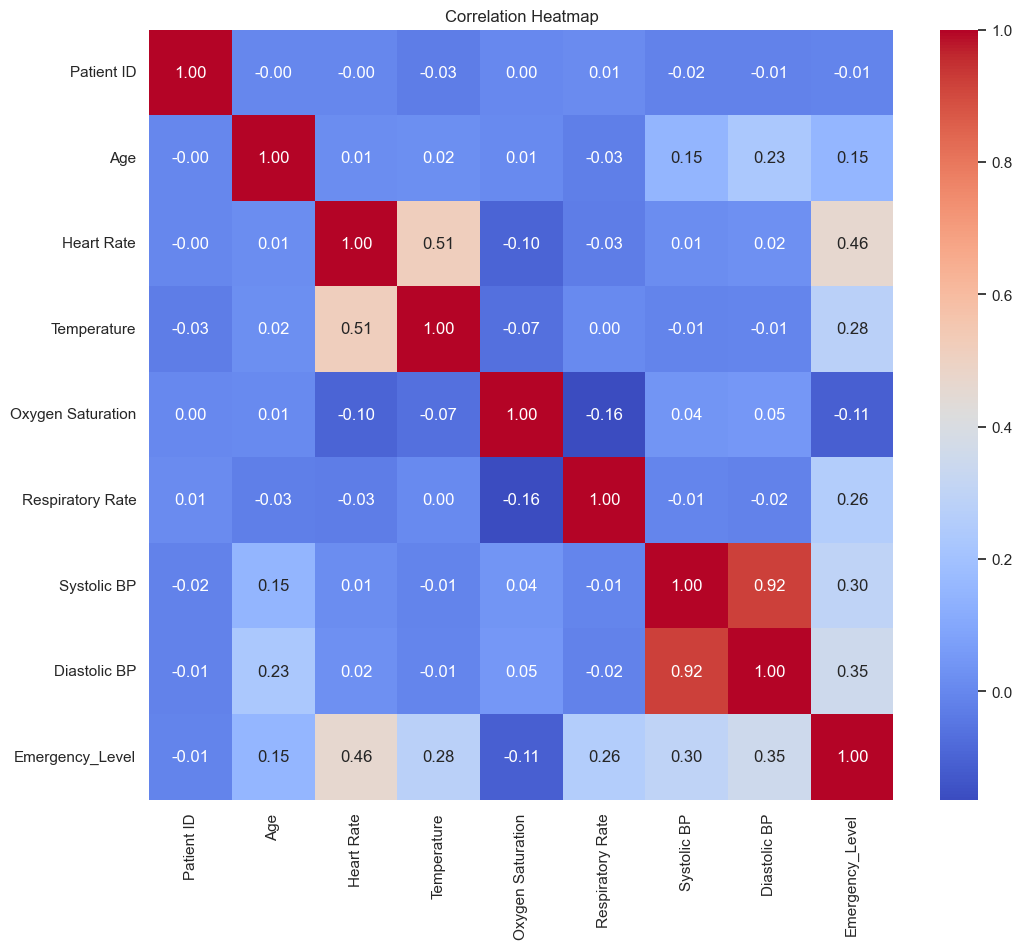

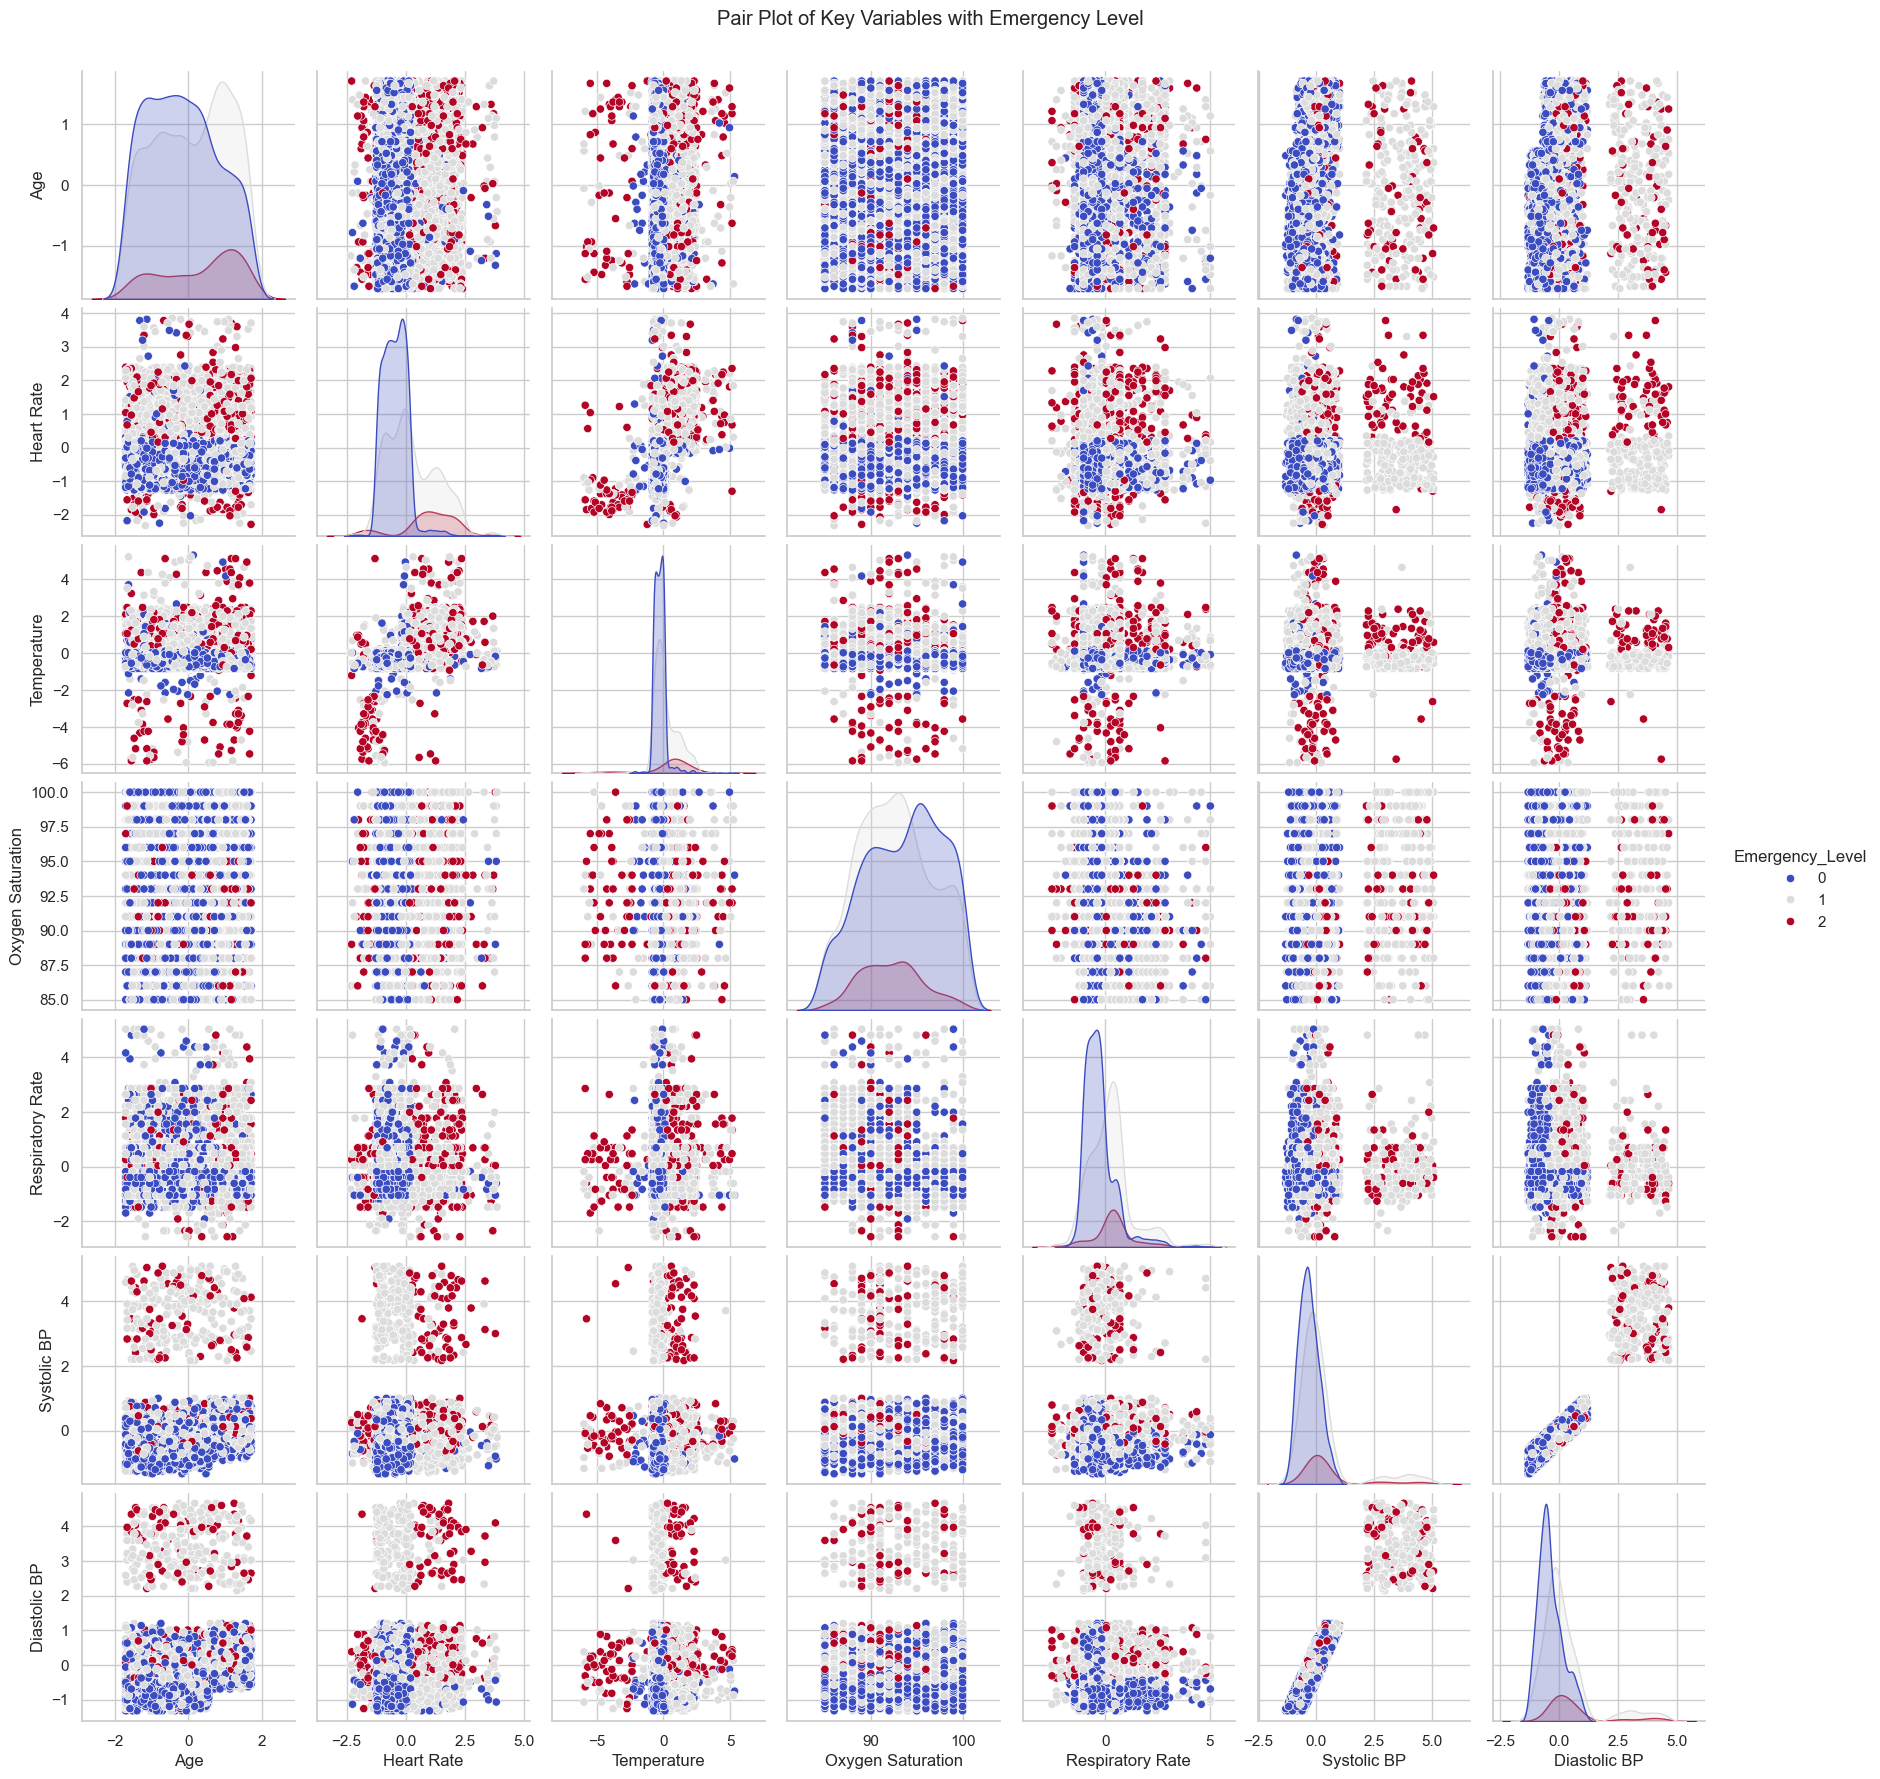

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df['Admission Date'] = pd.to_datetime(df['Admission Date'])
df = df.sort_values('Admission Date')

# Selecting numerical columns for the heatmap
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Selecting key variables for the pair plot
key_vars = ['Age', 'Heart Rate', 'Temperature', 'Oxygen Saturation', 'Respiratory Rate', 'Systolic BP', 'Diastolic BP', 'Emergency_Level']

# Creating the pair plot
sns.pairplot(df[key_vars], hue='Emergency_Level', palette='coolwarm')
plt.suptitle('Pair Plot of Key Variables with Emergency Level', y=1.02)
plt.show()


............................. plots over.....................................

## emergency score  generation 


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Load the dataset
df = pd.read_csv('preporcessed_data.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Prepare the features and target
X = df.drop(columns=['Patient ID', 'Emergency_Level', 'Admission Date'])
y = df['Emergency_Level']

# Convert boolean columns to integers
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Normalize the feature data using StandardScaler to bring all features to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict probabilities for the test set (continuous score)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability for emergency level 1 (positive class)

# Evaluate the model accuracy and F1 score
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Check if the model's accuracy meets the 85% threshold
if accuracy < 0.85:
    print(f"Warning: Model accuracy is below 85%. Current accuracy: {accuracy * 100:.2f}%")
else:
    print(f"Model accuracy is satisfactory: {accuracy * 100:.2f}%")

# Add the continuous emergency score to the original dataset
df['Emergency Score'] = log_reg.predict_proba(scaler.transform(X))[:, 1]

# Display the updated dataset
print(df[['Patient ID', 'Emergency Score']])
df.head(10)

# Save the updated DataFrame to the CSV file
df.to_csv('preporcessed_data.csv', index=False)

df.head()




      Patient ID  Emergency Score
0           4558         0.620436
1           1248         0.347401
2           1170         0.779786
3           2610         0.595486
4           4976         0.811208
...          ...              ...
4995         756         0.539078
4996        1144         0.793044
4997        1962         0.448641
4998        2174         0.142680
4999        3139         0.163795

[4502 rows x 2 columns]


,Unnamed: 0,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,...,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke,Emergency_Level,Emergency Score
0,4557,4558,1.635070,0.197180,1.060430,92,-0.614807,2023-01-01,0.461616,0.192977,...,False,False,True,False,False,False,False,False,0,0.620436
1,1247,1248,-0.822977,-0.606656,-0.074567,94,-0.180130,2023-01-01,-0.202329,0.067210,...,False,False,False,False,False,False,False,True,0,0.347401
2,1169,1170,-0.438907,1.731777,1.249596,88,-1.049484,2023-01-01,-0.658791,-0.247208,...,False,False,True,False,False,False,False,False,1,0.779786
3,2609,2610,1.327814,1.366397,0.682097,100,0.689224,2023-01-01,0.005154,0.004326,...,False,False,False,False,False,False,True,False,2,0.595486
4,4975,4976,-0.054837,2.133695,1.249596,99,-0.397469,2023-01-01,-0.285322,-0.750276,...,False,False,False,False,False,False,False,True,1,0.811208


In [10]:
# # Import the necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score

# # Split the data into training and testing sets (use the previously normalized and split data)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Initialize the Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_rf = rf_classifier.predict(X_test)

# # Evaluate the Random Forest model's accuracy and F1 score
# rf_accuracy = accuracy_score(y_test, y_pred_rf)
# rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')



# # Compare to Logistic Regression (if you've already computed logistic accuracy)
# print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
# print(f"Logistic Regression F1 Score: {f1:.2f}")

# # Feature Importance Analysis
# importances = rf_classifier.feature_importances_
# indices = np.argsort(importances)[::-1]
# features = X.columns

# # Print the feature rankings
# print("Feature ranking:")
# for i in range(X.shape[1]):
#     print(f"{i+1}. Feature {features[indices[i]]} ({importances[indices[i]]})")

# # Plot 1: Bar Plot for Feature Importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=importances[indices], y=features, palette='viridis')
# plt.title("Feature Importance from Random Forest Classifier")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.show()



In [11]:

df.head(10)

,Unnamed: 0,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,...,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke,Emergency_Level,Emergency Score
0,4557,4558,1.635070,0.197180,1.060430,92,-0.614807,2023-01-01,0.461616,0.192977,...,False,False,True,False,False,False,False,False,0,0.620436
1,1247,1248,-0.822977,-0.606656,-0.074567,94,-0.180130,2023-01-01,-0.202329,0.067210,...,False,False,False,False,False,False,False,True,0,0.347401
2,1169,1170,-0.438907,1.731777,1.249596,88,-1.049484,2023-01-01,-0.658791,-0.247208,...,False,False,True,False,False,False,False,False,1,0.779786
3,2609,2610,1.327814,1.366397,0.682097,100,0.689224,2023-01-01,0.005154,0.004326,...,False,False,False,False,False,False,True,False,2,0.595486
4,4975,4976,-0.054837,2.133695,1.249596,99,-0.397469,2023-01-01,-0.285322,-0.750276,...,False,False,False,False,False,False,False,True,1,0.811208
5,2017,2018,-0.899791,-0.789346,-0.642065,92,-1.049484,2023-01-01,-1.115254,-1.316229,...,False,False,False,False,False,False,False,False,0,0.009879
6,2880,2881,-1.667931,-1.081650,-0.736649,93,-0.180130,2023-01-01,-0.617295,-1.190461,...,False,False,False,True,False,False,False,False,0,0.023734
7,1731,1732,-0.630942,-1.264340,-0.358316,90,-1.049484,2023-01-01,-0.368315,-0.435859,...,False,False,False,False,False,False,False,True,0,0.050165
9,694,695,0.559674,0.124104,1.155013,98,0.254547,2023-01-01,-0.326819,-0.310091,...,False,True,False,False,False,False,True,False,1,0.831702
10,977,978,-1.437489,0.708713,-0.169150,93,-1.049484,2023-01-01,-0.741785,-0.561626,...,False,False,False,False,False,False,True,False,0,0.300722


In [12]:
# Checking class distribution
print(df['Emergency_Level'].value_counts())
df.head()


Emergency_Level
1    2055
0    2026
2     421
Name: count, dtype: int64


,Unnamed: 0,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,...,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke,Emergency_Level,Emergency Score
0,4557,4558,1.635070,0.197180,1.060430,92,-0.614807,2023-01-01,0.461616,0.192977,...,False,False,True,False,False,False,False,False,0,0.620436
1,1247,1248,-0.822977,-0.606656,-0.074567,94,-0.180130,2023-01-01,-0.202329,0.067210,...,False,False,False,False,False,False,False,True,0,0.347401
2,1169,1170,-0.438907,1.731777,1.249596,88,-1.049484,2023-01-01,-0.658791,-0.247208,...,False,False,True,False,False,False,False,False,1,0.779786
3,2609,2610,1.327814,1.366397,0.682097,100,0.689224,2023-01-01,0.005154,0.004326,...,False,False,False,False,False,False,True,False,2,0.595486
4,4975,4976,-0.054837,2.133695,1.249596,99,-0.397469,2023-01-01,-0.285322,-0.750276,...,False,False,False,False,False,False,False,True,1,0.811208


#  ........

Prepare and Preprocess the Data

In [13]:
import pandas as pd

# Load the data
data_df = pd.read_csv('data.csv')
processed_df = pd.read_csv('preporcessed_data.csv')

# Print column names to verify
print("Columns in processed_df:")
print(processed_df.columns)


processed_df.head()

Columns in processed_df:
Index(['Unnamed: 0', 'Patient ID', 'Age', 'Heart Rate', 'Temperature',
       'Oxygen Saturation', 'Respiratory Rate', 'Admission Date',
       'Systolic BP', 'Diastolic BP', 'Gender_Male', 'Gender_Other',
       'Symptoms_Cough', 'Symptoms_Fatigue', 'Symptoms_Fever',
       'Symptoms_Headache', 'Symptoms_Nausea', 'Symptoms_Shortness of Breath',
       'Medical History_COVID-19', 'Medical History_Diabetes',
       'Medical History_Heart Disease', 'Medical History_Hypertension',
       'Medical History_Stroke', 'Diagnosis_COVID-19', 'Diagnosis_Diabetes',
       'Diagnosis_Flu', 'Diagnosis_Healthy', 'Diagnosis_Hypertension',
       'Diagnosis_Stroke', 'Emergency_Level', 'Emergency Score'],
      dtype='object')


,Unnamed: 0,Patient ID,Age,Heart Rate,Temperature,Oxygen Saturation,Respiratory Rate,Admission Date,Systolic BP,Diastolic BP,...,Medical History_Hypertension,Medical History_Stroke,Diagnosis_COVID-19,Diagnosis_Diabetes,Diagnosis_Flu,Diagnosis_Healthy,Diagnosis_Hypertension,Diagnosis_Stroke,Emergency_Level,Emergency Score
0,4557,4558,1.635070,0.197180,1.060430,92,-0.614807,2023-01-01,0.461616,0.192977,...,False,False,True,False,False,False,False,False,0,0.620436
1,1247,1248,-0.822977,-0.606656,-0.074567,94,-0.180130,2023-01-01,-0.202329,0.067210,...,False,False,False,False,False,False,False,True,0,0.347401
2,1169,1170,-0.438907,1.731777,1.249596,88,-1.049484,2023-01-01,-0.658791,-0.247208,...,False,False,True,False,False,False,False,False,1,0.779786
3,2609,2610,1.327814,1.366397,0.682097,100,0.689224,2023-01-01,0.005154,0.004326,...,False,False,False,False,False,False,True,False,2,0.595486
4,4975,4976,-0.054837,2.133695,1.249596,99,-0.397469,2023-01-01,-0.285322,-0.750276,...,False,False,False,False,False,False,False,True,1,0.811208


### Creating a new file with raw data and emergency score mapping

In [14]:
import pandas as pd

# Load the data
data_df = pd.read_csv('data.csv')
processed_df = pd.read_csv('preporcessed_data.csv')

# Select the necessary columns from processed.csv (Patient ID, Systolic BP, Diastolic BP, Emergency Score)
processed_df = processed_df[['Patient ID', 'Systolic BP', 'Diastolic BP', 'Emergency Score']]

# Merge both dataframes on 'Patient ID'
merged_df = pd.merge(data_df, processed_df, on='Patient ID', how='left')

# Drop the 'Blood Pressure' column from the merged dataframe
merged_df = merged_df.drop('Blood Pressure', axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('training_data.csv', index=False)

print("Merged CSV file saved as 'merged_data.csv' without the 'Blood Pressure' column")


Merged CSV file saved as 'merged_data.csv' without the 'Blood Pressure' column


# Model Training 

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('training_data.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df[['Patient ID', 'Age', 'Gender','Systolic BP','Diastolic BP', 'Heart Rate', 
        'Temperature', 'Oxygen Saturation', 'Respiratory Rate', 
        'Symptoms', 'Medical History', 'Diagnosis', 'Admission Date']]
y = df['Emergency Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical features
numerical_features = ['Age', 'Heart Rate','Systolic BP','Diastolic BP', 'Temperature', 'Oxygen Saturation', 'Respiratory Rate']
categorical_features = ['Gender', 'Symptoms', 'Medical History', 'Diagnosis']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Check the model performance
print(f"Training accuracy: {model.score(X_train, y_train):.2f}")
print(f"Testing accuracy: {model.score(X_test, y_test):.2f}")


Training accuracy: 0.99
Testing accuracy: 0.93


# ...........................plot ..............................

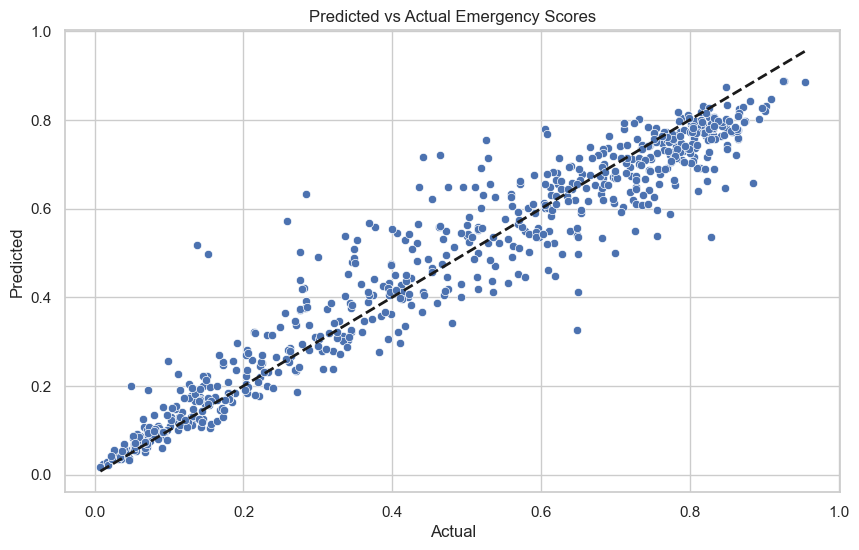

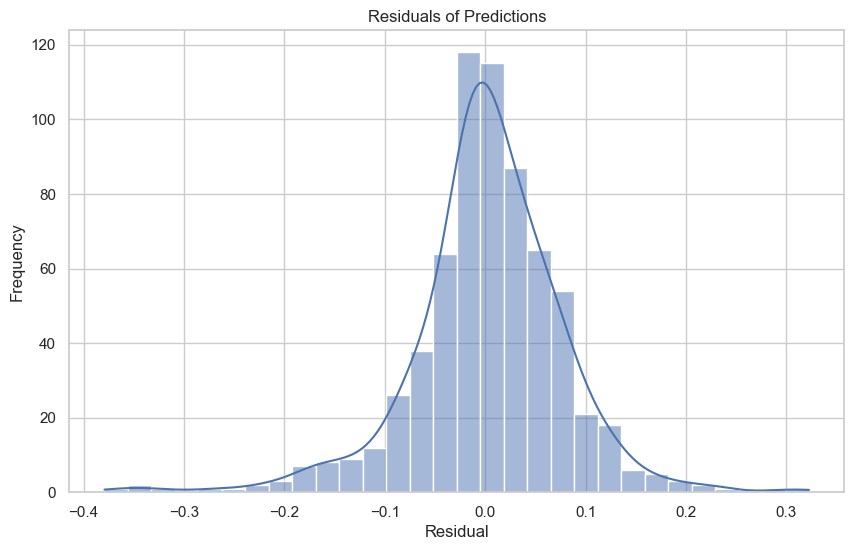

In [16]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame for plotting
pred_vs_actual_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=pred_vs_actual_df)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Emergency Scores')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
# This plot shows the residuals (differences between actual and predicted values) to help identify any patterns.
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals of Predictions')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


# Predection 

In [17]:
# New patient data
new_data = pd.DataFrame({
    'Patient ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [49, 33, 7, 30, 14, 88, 73, 76, 40, 61],
    'Gender': ['Female', 'Other', 'Female', 'Male', 'Other', 'Male', 'Other', 'Other', 'Female', 'Female'],
    'Blood Pressure': ['130/92', '118/82', '138/95', '140/93', '120/87', '139/100', '130/97', '140/97', '111/73', '130/99'],
    'Heart Rate': [121.0, 95.0, 69.0, 89.0, 148.0, 70.0, None, 155.0, 152.0, 191.0],
    'Temperature': [39.3, 36.9, 37.3, 37.0, 37.9, 37.2, 38.2, 38.7, 38.1, 40.0],
    'Oxygen Saturation': [89, 96, 100, 85, 93, 89, 90, 98, 94, 90],
    'Respiratory Rate': [18, 13, 13, 14, 18, 11, 19, 17, 15, 15],
    'Symptoms': ['Shortness of Breath', 'Headache', 'Chest Pain', 'Cough', 'Fever', 'Fatigue', 'Fever', 'Fever', 'Fever', 'Cough'],
    'Medical History': ['Hypertension', 'Diabetes', 'Hypertension', 'Hypertension', 'COVID-19', 'COVID-19', 'COVID-19', 'Stroke', 'Asthma', 'Hypertension'],
    'Diagnosis': ['COVID-19', 'Healthy', 'Flu', 'Asthma', 'Stroke', 'Stroke', 'Hypertension', 'Diabetes', 'Healthy', 'COVID-19'],
    'Admission Date': ['2023-10-23', '2023-10-28', '2023-01-14', '2023-08-23', '2023-12-30', '2023-06-16', '2023-03-04', '2023-09-20', '2023-07-14', '2023-08-30']
})

# Split the Blood Pressure column into Systolic BP and Diastolic BP
new_data[['Systolic BP', 'Diastolic BP']] = new_data['Blood Pressure'].str.split('/', expand=True)

# Convert Systolic BP and Diastolic BP to numeric (if needed)
new_data['Systolic BP'] = pd.to_numeric(new_data['Systolic BP'])
new_data['Diastolic BP'] = pd.to_numeric(new_data['Diastolic BP'])

# Drop the original Blood Pressure column
new_data = new_data.drop('Blood Pressure', axis=1)


new_data.head(10)
# Drop rows with missing values
new_data_clean = new_data.dropna()

new_data_clean.head()

# Predict the emergency scores with cleaned data
predicted_scores = model.predict(new_data_clean)

# Create a dictionary of Patient ID and Emergency Score
patient_emergency_scores = {int(patient_id): score for patient_id, score in zip(new_data_clean['Patient ID'], predicted_scores)}


# Print the dictionary
print("Patient ID : Emergency Score")
for patient_id, score in patient_emergency_scores.items():
    print(f"{patient_id} : {score:.2f}")


Patient ID : Emergency Score
1 : 0.32
2 : 0.79
3 : 0.84
4 : 0.83
5 : 0.39
6 : 0.78
8 : 0.30
9 : 0.31
10 : 0.29


# ..............

In [18]:
import pandas as pd

def allocate_beds(patient_data, emergency_scores_dict, available_beds):
    """
    Allocate beds to patients based on their emergency scores.
    
    Parameters:
    - patient_data: DataFrame containing patient IDs
    - emergency_scores_dict: Dictionary with patient IDs as keys and emergency scores as values
    - available_beds: Number of available beds
    
    Returns:
    - DataFrame with patient ID, emergency score, and allocated status
    """
    
    # Convert the dictionary to a DataFrame
    emergency_scores_df = pd.DataFrame(list(emergency_scores_dict.items()), columns=['Patient ID', 'Emergency Score'])
    
    # Merge the patient data with the emergency scores
    patient_data = patient_data.merge(emergency_scores_df, on='Patient ID')
    
    # Sort patients by emergency score in descending order
    patient_data_sorted = patient_data.sort_values(by='Emergency Score', ascending=False)
    
    # Allocate beds
    patient_data_sorted['Allocated'] = [True if i < available_beds else False for i in range(len(patient_data_sorted))]
    
    return patient_data_sorted[['Patient ID', 'Emergency Score', 'Allocated']]

# Sample patient data
patient_data = pd.DataFrame({
    'Patient ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# Sample emergency scores dictionary (these would come from your model's predictions)


# Number of beds available
available_beds = 5

# Allocate beds
allocation_result = allocate_beds(patient_data, patient_emergency_scores, available_beds)

# Display results
print("Bed Allocation Results:")
print(allocation_result)


Bed Allocation Results:
   Patient ID  Emergency Score  Allocated
2           3         0.838107       True
3           4         0.825712       True
1           2         0.791448       True
5           6         0.779574       True
4           5         0.385976       True
0           1         0.316640      False
7           9         0.307636      False
6           8         0.304862      False
8          10         0.289423      False
